In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

In [16]:
path = 'lalonde.csv'
patients_df = pd.DataFrame.from_csv(path, sep=",")
patients_df.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


### Clean Data

In [17]:
# Cast values to numeric
patients_df.apply(pd.to_numeric, errors = 'coerce')
type(patients_df.iloc[1,1])

numpy.int64

### Split not treated and treated

In [4]:
# splits a dataframe on a two-categorical column by values
def split_in_two(df, column):
    first = df[df[column] == 0]
    second = df[df[column] == 1]
    return first, second

In [5]:
ntreated_df, treated_df = split_in_two(patients_df, 'treat')
treated_df.tail(2)

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW184,1,35,8,1,0,1,1,13732.07,17976.15,3786.628
NSW185,1,33,11,1,0,1,1,14660.71,25142.24,4181.942


In [25]:
ntreated_df.head(2)

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
PSID1,0,30,12,0,0,1,0,20166.73,18347.23,25564.67
PSID2,0,26,12,0,0,1,0,25862.32,17806.55,25564.67


### 1. A naive analysis

Now that we have the treated and untreated person, we can compare the outcome variable

In [18]:
ntreated_df['re78'].describe()

count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64

In [19]:
treated_df['re78'].describe()

count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

What happen if we take the max and min of the re74, re75 and re78

In [7]:
def get_min_max(df, first_col, last_col):
    values = df.loc[:, first_col:last_col]
    min_value = values.min().min()
    max_value = values.max().max()
    return min_value, max_value

In [8]:
min_re, max_re = get_min_max(patients_df, 're74', 're78')
max_re

60307.93

We can see that's it's smaller than the re78 (re78 has the most max)

Now we will compare them with plots

In [9]:
def get_column_serie(df, column):
    return df[[column]].values[:, 0]

In [10]:
def create_bins(min_val, max_val, interval):
    bins_ = []
    for i in range(int(min_val), int(max_val), interval):
        bins_.append(i)
    return bins_

In [11]:
cut_range = 2000
bins_ = create_bins(min_re, max_re, cut_range)

In [12]:
def make_comparative_histogram(df1, df2, column, bins_param, xlabel, legends):
    serie1 = get_column_serie(df1, column)
    serie2 = get_column_serie(df2, column)
    
    plt.hist([serie1, serie2], bins=bins_param,  edgecolor="k")
    plt.xlabel(xlabel)
    plt.legend(legends)
    plt.show()

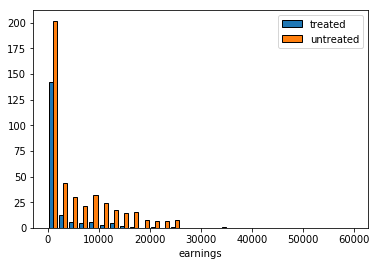

In [13]:
make_comparative_histogram(treated_df, ntreated_df, 're74', bins_, 'earnings', ['treated', 'untreated'])


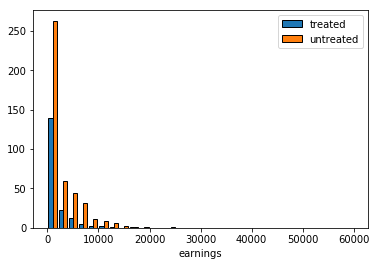

In [14]:
make_comparative_histogram(treated_df, ntreated_df, 're75', bins_, 'earnings', ['treated', 'untreated'])

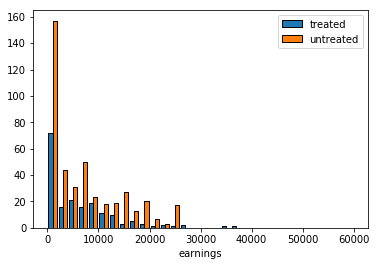

In [15]:
make_comparative_histogram(treated_df, ntreated_df, 're78', bins_, 'earnings', ['treated', 'untreated'])

Here the naive analysis might conclude that the treatment doesn't work. We can conclude this because the average income of the not treated group is always higher than the treated group.

### 2. A closer look at the data